In [ ]:
!pip install fairpredictor leafmap efficientnet

In [11]:
from predictor import predict
import efficientnet.keras as efn

In [12]:
import requests
import shutil
import leafmap
import json
from predictor import download

import geopandas as gpd
import matplotlib.pyplot as plt


BASE_FAIR_API_URL='https://fair-dev.hotosm.org/api/v1'

def get_model(model_id):
  model_meta=requests.get(f'{BASE_FAIR_API_URL}/model/{model_id}/')
  model_meta.raise_for_status()
  model_meta=model_meta.json()
  print(model_meta)
  model_path = 'checkpoint.h5'
  url=f'{BASE_FAIR_API_URL}/workspace/download/dataset_{model_meta["dataset"]}/output/training_{model_meta["published_training"]}/checkpoint.h5'

  response = requests.get(url, stream=True)
  response.raise_for_status()
  with open(model_path, 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
  return model_path


def display_predictions_gdf(predictions):
  predictions_gdf = gpd.GeoDataFrame.from_features(predictions)
  predictions_gdf.plot()
  plt.show()


## Set parameters

    model_id : Model ID Published on fAIr
    zoom_level : Zoom level of the tiles to be used for prediction
    tms_url : Your Image URL on which you want to detect feature



In [13]:
model_id = 121
zoom_level = 20
tms_url = 'https://tiles.openaerialmap.org/65e4bb85e6f8d4000128235a/0/65e4bb85e6f8d4000128235b/{z}/{x}/{y}'

##  Download model from the server

In [14]:
model_path=get_model(model_id)

{'id': 121, 'name': 'Monrovia e2e', 'created_at': '2024-03-05T10:16:58.048863Z', 'last_modified': '2024-03-14T04:23:54.618232Z', 'published_training': 438, 'status': 0, 'dataset': 189, 'created_by': 7004124}


## Define bounding box for your prediction

  
  Create your area of interest from leafmap GUI

In [8]:
m = leafmap.Map(center=(6.3156, -10.8074), zoom=14)
m.add_tile_layer(url=tms_url,name="OAM Image",attribution='OAM')
m

Map(center=[6.3156, -10.8074], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

### Get bounding box from map

In [15]:
# bbox=m.user_roi_bounds()

bbox=[-10.7933, 6.3737, -10.7921, 6.3749]

## Predict

In [19]:
print(model_path)

checkpoint.h5


In [22]:
model_path='/Users/kshitij/hotosm/fairpredictor/checkpoint.h5'

predictions=predict(bbox,model_path,zoom_level,tms_url,tile_overlap_distance=0.01,remove_metadata=False)
print(predictions)
# print(json.dumps(predictions))

Download starting from [492850, 505684] to [492853, 505681] using source https://tiles.openaerialmap.org/65e4bb85e6f8d4000128235a/0/65e4bb85e6f8d4000128235b/{z}/{x}/{y} - 20
Using : /Users/kshitij/hotosm/fairpredictor/checkpoint.h5


TypeError: Object of type function is not JSON serializable

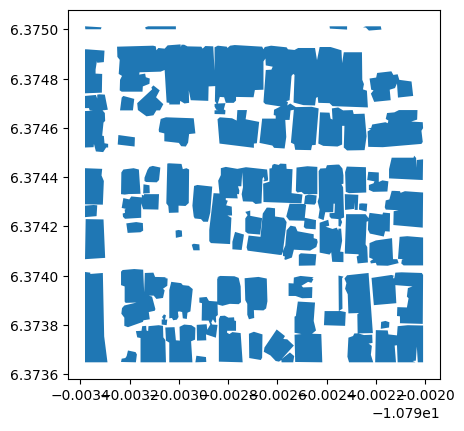

In [44]:
display_predictions_gdf(predictions)